In [1]:
#Examples
import numpy as np
# Define the coefficient matrix A and the right-hand side vector B
A = np.array([[2, 1], [1, 3]])
B = np.array([4, 7])
# Solve for the variables X using matrix inversion
X = np.linalg.inv(A).dot(B)
print("Solution:")
print(X)

Solution:
[1. 2.]


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# Fit a polynomial regression model
degree = 2 # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

In [5]:
# Make predictions
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
Y_new = model.predict(X_new_poly)

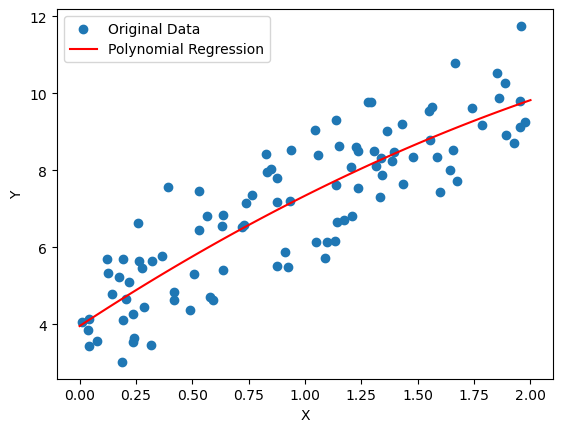

In [6]:
# Plot the original data and the polynomial regression curve
plt.scatter(X, Y, label='Original Data')
plt.plot(X_new, Y_new, 'r-', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [7]:
# The coefficients of the multivariate polynomial regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

Coefficients:
[[ 0.          3.84100842 -0.45190593]]
Intercept:
[3.95139826]


Q1

In [8]:
import pandas as pd
import numpy as np

In [10]:
df=pd.DataFrame({'Temp':[50,50,50,70,70,70,80,80,80,90,90,90,100,100,100],
               'Yield':[3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3.0,3.1,2.8,3.3,3.5,3.0]})

In [11]:
df.to_csv('temp_yield.csv')

In [12]:
#linear regression using Pedhazur
x_mean=df['Temp'].mean()
y_mean=df['Yield'].mean()
print(f'x_mean={x_mean}')
print(f'y_mean={y_mean}')

x_mean=78.0
y_mean=2.833333333333333


In [13]:
numerator_b1=np.sum((df['Temp']-x_mean)*(df['Yield']-y_mean))
denominator_b1=np.sum((df['Temp']-x_mean)**2)
b1=numerator_b1/denominator_b1
b1

0.006756756756756758

In [15]:
b0=y_mean-(b1*x_mean)
b0

2.306306306306306

In [16]:
df['pedhazur_pred']=b0+(df['Temp']*b1)
df[['pedhazur_pred','Yield']]

,pedhazur_pred,Yield
0,2.644144,3.3
1,2.644144,2.8
2,2.644144,2.9
3,2.779279,2.3
4,2.779279,2.6
5,2.779279,2.1
6,2.846847,2.5
7,2.846847,2.9
8,2.846847,2.4
9,2.914414,3.0


In [18]:
#polynomial regression using matrix formulation
n=len(df)
xi_sum=np.sum(df['Temp'])
xi_sq_sum=np.sum(df['Temp']**2)
xi_cube_sum=np.sum(df['Temp']**3)
xi_4_sum=np.sum(df['Temp']**4)

mat1=np.array([[n,xi_sum,xi_sq_sum],
              [xi_sum,xi_sq_sum,xi_cube_sum],
              [xi_sq_sum,xi_cube_sum,xi_4_sum]])
mat1

array([[       15,      1170,     95700],
       [     1170,     95700,   8127000],
       [    95700,   8127000, 710490000]])

In [19]:
yi_sum=np.sum(df['Yield'])
xy_sum=np.sum(df['Temp']*df['Yield'])
x2y_sum=np.sum((df['Temp']**2)*df['Yield'])

mat2=np.array([[yi_sum],
               [xy_sum],
               [x2y_sum]])
mat2

array([[4.2500e+01],
       [3.3450e+03],
       [2.7681e+05]])

In [21]:
mat1_inv=np.linalg.inv(mat1)
mat1_inv

array([[ 2.65336279e+01, -7.29823270e-01,  4.77417771e-03],
       [-7.29823270e-01,  2.04393716e-02, -1.35493373e-04],
       [ 4.77417771e-03, -1.35493373e-04,  9.08198331e-07]])

In [22]:
B=np.dot(mat1_inv,mat2)
B

array([[ 7.96048110e+00],
       [-1.53711340e-01],
       [ 1.07560137e-03]])

In [24]:
df['poly_pred']=B[0]+(B[1]*df['Temp'])+(B[2]*(df['Temp']**2))
df[['Yield','pedhazur_pred','poly_pred']]

,Yield,pedhazur_pred,poly_pred
0,3.3,2.644144,2.963918
1,2.8,2.644144,2.963918
2,2.9,2.644144,2.963918
3,2.3,2.779279,2.471134
4,2.6,2.779279,2.471134
5,2.1,2.779279,2.471134
6,2.5,2.846847,2.547423
7,2.9,2.846847,2.547423
8,2.4,2.846847,2.547423
9,3.0,2.914414,2.838832


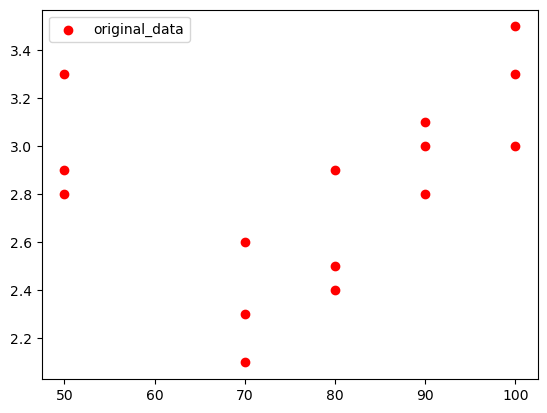

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df['Temp'],df['Yield'],color='red',marker='o',label='original_data')
plt.legend()

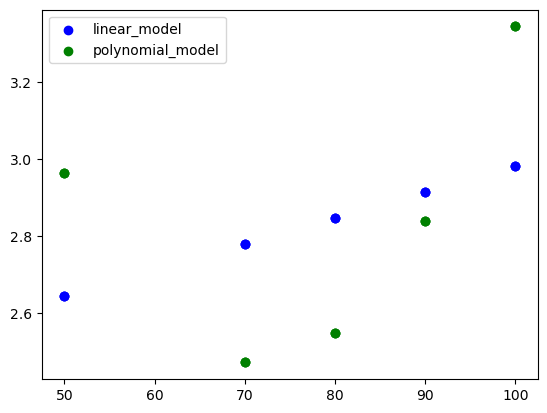

In [39]:
plt.scatter(df['Temp'],df['pedhazur_pred'],color='blue',marker='o',label='linear_model')
plt.scatter(df['Temp'],df['poly_pred'],color='green',marker='o',label='polynomial_model')

plt.legend()

In [31]:
#Error
df['linear_error']=df['Yield']-df['pedhazur_pred']
df['linear_error']

0     0.655856
1     0.155856
2     0.255856
3    -0.479279
4    -0.179279
5    -0.679279
6    -0.346847
7     0.053153
8    -0.446847
9     0.085586
10    0.185586
11   -0.114414
12    0.318018
13    0.518018
14    0.018018
Name: linear_error, dtype: float64

In [32]:
mse=np.sum(df['linear_error']**2)/n
mse

0.13270870870870877

In [33]:
rmse=mse**0.5
rmse

0.36429206511905904